# Load relevant libaray and pacakge

In [1]:
#import package
import Chapter_2_functions as chap2_funcs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set tick parameters labelsize for the entire notebook
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

In [3]:
savepath,loadpath=chap2_funcs.obtain_paths()

# Fig 1 - 2d velocity side plot

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


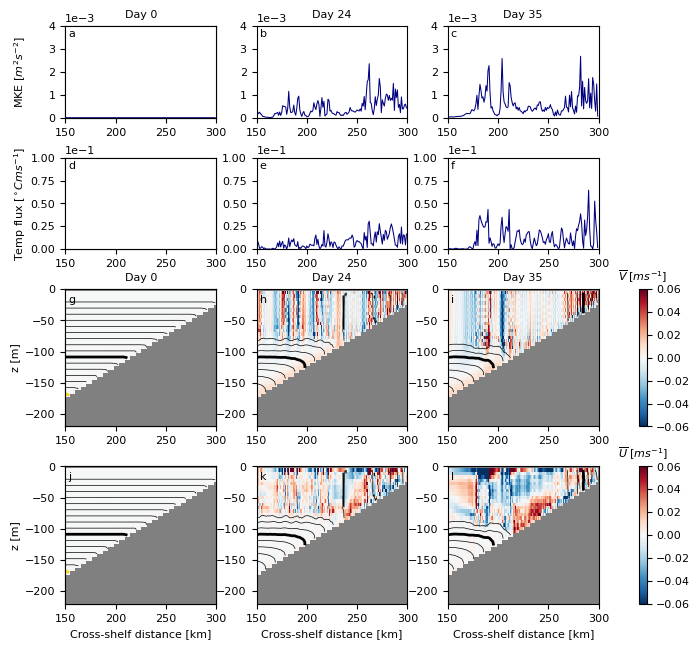

In [5]:
fig=plt.figure(figsize=(7.5,7.5))
p_2d=chap2_funcs.plot_vel_2d_snapshots(loadpath,fig,days_sel=[0,24,35,],
                                       ylims_KE=(0,4e-3),
                                       ylims_flux=(0,0.1),
                                       vmax_V=0.06,vmin_V=-0.06,
                                       vmax_U=0.06,vmin_U=-0.06)
plt.savefig(savepath+'Fig1.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)


c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


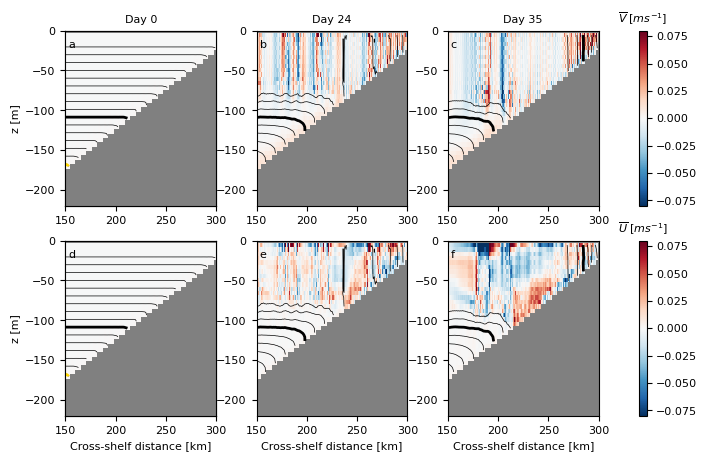

In [5]:
fig=plt.figure(figsize=(7.5,5))
p_2d=chap2_funcs.plot_vel_2d(fig,days_sel=[0,24,35,],vmax_V=0.08,vmin_V=-0.08,
                 vmax_U=0.08,vmin_U=-0.08)
plt.savefig(savepath+'Fig3_1.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig deepening of the MLD

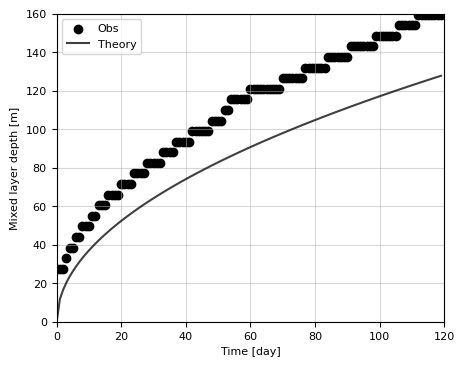

In [5]:

fig=plt.figure(figsize=(5,4))
plot_2d_MLD=chap2_funcs.plot_MLD_for_2D(fig,loadpath,)
plt.savefig(savepath+'Fig2d_MLD.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [5]:
MLD_obs_3D=chap2_funcs.load_MLD_for_3Dbase(loadpath)
MLD_obs_2D,MLD_theory=chap2_funcs.load_MLD_for_2D(loadpath)
run_date=np.arange(120)
xlims=(0,120)
ylims=(0,165)

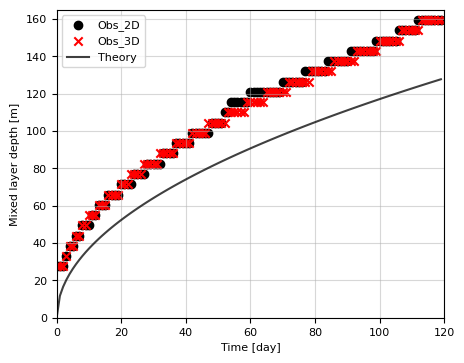

In [13]:

fig=plt.figure(figsize=(5,4))
ax=fig.add_subplot(111)
ax.scatter(run_date,MLD_obs_2D,label='Obs_2D',color='k')
ax.scatter(run_date,MLD_obs_3D,label='Obs_3D',color='r',marker='x')
ax.plot(run_date,MLD_theory,label='Theory',color='k',alpha=0.75)
ax.set_xlabel('Time [day]',fontsize=8)
ax.set_ylabel('Mixed layer depth [m]',fontsize=8)
ax.grid(alpha=0.5)
ax.legend(fontsize=8)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.tick_params(axis='both',which='major',labelsize=8)

plt.savefig(savepath+'Fig_MLD_compare.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

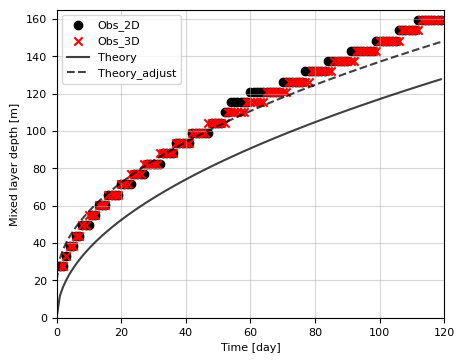

In [14]:
fig=plt.figure(figsize=(5,4))
ax=fig.add_subplot(111)
ax.scatter(run_date,MLD_obs_2D,label='Obs_2D',color='k')
ax.scatter(run_date,MLD_obs_3D,label='Obs_3D',color='r',marker='x')
ax.plot(run_date,MLD_theory,label='Theory',color='k',alpha=0.75)
ax.plot(run_date,MLD_theory+20,label='Theory_adjust',color='k',alpha=0.75,linestyle='--')
ax.set_xlabel('Time [day]',fontsize=8)
ax.set_ylabel('Mixed layer depth [m]',fontsize=8)
ax.grid(alpha=0.5)
ax.legend(fontsize=8)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.tick_params(axis='both',which='major',labelsize=8)

plt.savefig(savepath+'Fig3_4_v2.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 2-  temp flux budget 2d

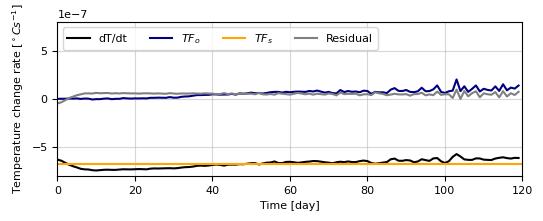

In [5]:
# CV- 25km of the coaste
fig=plt.figure(figsize=(6,2))
plot_2d=chap2_funcs.plot_temp_budget_2d(fig,loadpath,ylims=(-8e-7,8e-7))
plt.savefig(savepath+'Fig2.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 3 - compare different control volume

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:293: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


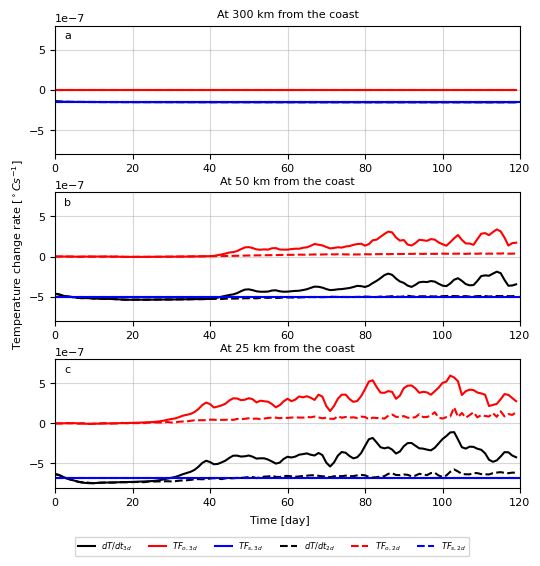

In [4]:
file_names=['0km_temp_balance_test_for_base_cases.nc',
           '250km_temp_balance_test_for_base_cases.nc',
           '275km_temp_balance_test_for_base_cases.nc']

fig=plt.figure(figsize=(6,6))
cs=chap2_funcs.plot_temp_budget_compare_CV(fig,loadpath,file_names,cross_shelf_loc=[300,50,25])
plt.savefig(savepath+'Fig3.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [10]:
def plot_temp_budget_compare_CV_w_details(fig,loadpath,file_names,
                                cross_shelf_loc,
                                    run_date=np.arange(120),
                                    xlims=(0,120),
                                    ylims=(-8e-7,8e-7)):
    # gs=fig.add_gridspec(nrows=3,ncols=1,hspace=0.3)
    ax=fig.add_subplot(111)
    file_name=file_names
    # cross_loc=cross_shelf_loc[i]
    dTdt_3d, dTdt_2d, TF_surf_3d, TF_surf_2d, TF_crossshore_3d, TF_crossshore_2d=load_2d_3d_compare_ds_w_filename(loadpath,file_name)
        # ax=fig.add_subplot(gs[i,0])
    ax.plot(run_date,dTdt_3d,label='$dT/dt_{3d}$',color='k')
    ax.plot(run_date,-TF_crossshore_3d,label='$TF_{o, 3d}$',color='r')
    ax.axhline(y=TF_surf_3d,label='$TF_{s, 3d}$',color='b')
    ax.plot(run_date,dTdt_2d,label='$dT/dt_{2d}$',color='k',linestyle='dashed')
    ax.plot(run_date,-TF_crossshore_2d,label='$TF_{o, 2d}$',color='r',linestyle='dashed')
    ax.axhline(y=TF_surf_2d,label='$TF_{s, 2d}$',color='b',linestyle='dashed')
    # ax.set_title('At {:02d} km from the coast'.format(cross_loc),fontsize=8)
    ax.grid(alpha=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    # ax.text(0.02, 0.9, '{}'.format(chr(97+i)), transform=ax.transAxes,zorder=10,fontsize=8)

    plt.tight_layout()    
    ax.legend(bbox_to_anchor=(0.9, -0.35),ncol=6,fontsize=68)
    # plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    ax.set_ylabel('Temperature change rate $[^\circ Cs^{-1}]$',fontsize=8)
    ax.set_xlabel('Time [day]', fontsize=8)

    return fig

Text(0.5, -3.277777777777782, 'Time [day]')

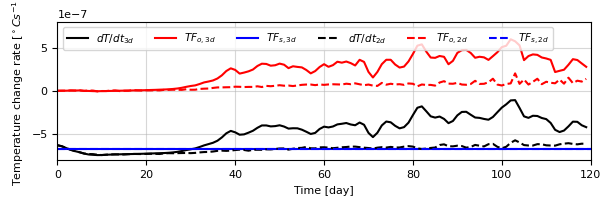

In [20]:
run_date=np.arange(120)  
xlims=(0,120)
ylims=(-8e-7,8e-7)
file_names='275km_temp_balance_test_for_base_cases.nc'

fig=plt.figure(figsize=(6,2))
ax=fig.add_subplot(111)
file_name=file_names
    # cross_loc=cross_shelf_loc[i]
dTdt_3d, dTdt_2d, TF_surf_3d, TF_surf_2d, TF_crossshore_3d, TF_crossshore_2d=chap2_funcs.load_2d_3d_compare_ds_w_filename(loadpath,file_name)
        # ax=fig.add_subplot(gs[i,0])
ax.plot(run_date,dTdt_3d,label='$dT/dt_{3d}$',color='k')
ax.plot(run_date,-TF_crossshore_3d,label='$TF_{o, 3d}$',color='r')
ax.axhline(y=TF_surf_3d,label='$TF_{s, 3d}$',color='b')
ax.plot(run_date,dTdt_2d,label='$dT/dt_{2d}$',color='k',linestyle='dashed')
ax.plot(run_date,-TF_crossshore_2d,label='$TF_{o, 2d}$',color='r',linestyle='dashed')
ax.axhline(y=TF_surf_2d,label='$TF_{s, 2d}$',color='b',linestyle='dashed')
    # ax.set_title('At {:02d} km from the coast'.format(cross_loc),fontsize=8)
ax.grid(alpha=0.5)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(8)
ax.tick_params(axis='both', which='major', labelsize=8)
    # ax.text(0.02, 0.9, '{}'.format(chr(97+i)), transform=ax.transAxes,zorder=10,fontsize=8)

plt.tight_layout()    
# ax.legend(bbox_to_anchor=(1.0, -0.25),ncol=6,fontsize=8)
ax.legend(loc='upper left',ncol=6,fontsize=7.5)
    # plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
ax.set_ylabel('Temperature change rate $[^\circ Cs^{-1}]$',fontsize=8)
ax.set_xlabel('Time [day]', fontsize=8)

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:444: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


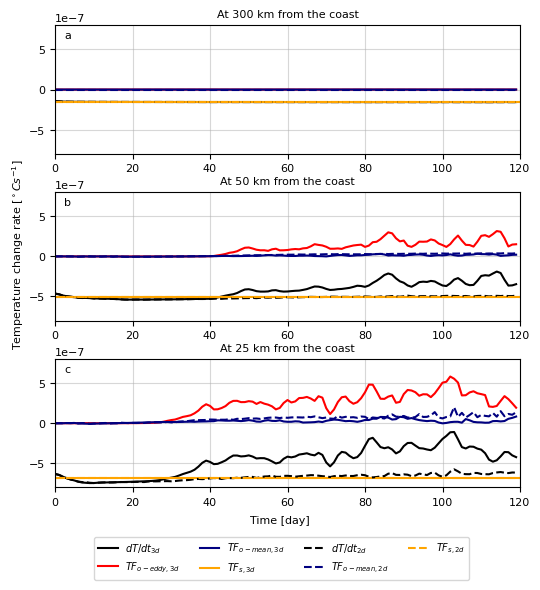

In [7]:

file_names_calc_eddy=['0km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '250km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '275km_cross_temp_flux_calc_mean_n_eddy.nc']

file_names=['0km_temp_balance_test_for_base_cases.nc',
           '250km_temp_balance_test_for_base_cases.nc',
           '275km_temp_balance_test_for_base_cases.nc']

fig=plt.figure(figsize=(6,6))
cs=chap2_funcs.plot_temp_budget_compare_CV_w_details(fig,loadpath,file_names,file_names_calc_eddy,
                                                     cross_shelf_loc=[300,50,25])
plt.savefig(savepath+'Fig3.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:483: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


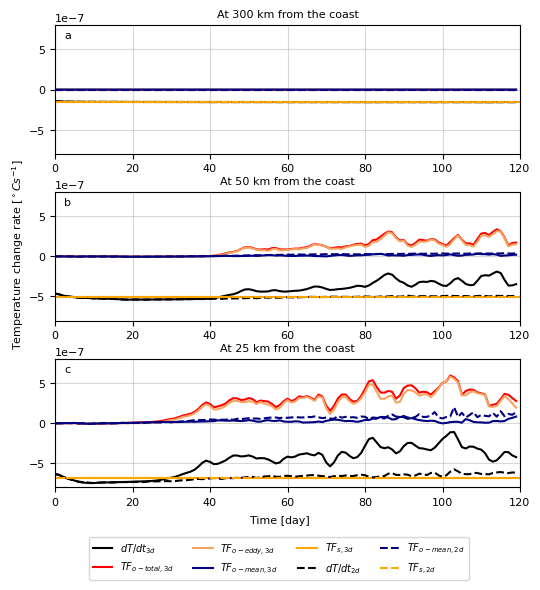

In [4]:


file_names_calc_eddy=['0km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '250km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '275km_cross_temp_flux_calc_mean_n_eddy.nc']

file_names=['0km_temp_balance_test_for_base_cases.nc',
           '250km_temp_balance_test_for_base_cases.nc',
           '275km_temp_balance_test_for_base_cases.nc']

fig=plt.figure(figsize=(6,6))
cs=chap2_funcs.plot_temp_budget_compare_CV_w_details_complex(fig,loadpath,file_names,file_names_calc_eddy,
                                                     cross_shelf_loc=[300,50,25])


In [9]:
file_names_calc_eddy=['0km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '250km_cross_temp_flux_calc_mean_n_eddy.nc',
                        '275km_cross_temp_flux_calc_mean_n_eddy.nc']

file_names=['0km_temp_balance_test_for_base_cases.nc',
           '250km_temp_balance_test_for_base_cases.nc',
           '275km_temp_balance_test_for_base_cases.nc']

In [77]:
ds=xr.open_dataset(loadpath+file_names[2])
ds2=xr.open_dataset(loadpath+file_names_calc_eddy[2])

In [79]:
ds

<xarray.Dataset>
Dimensions:               (time: 120)
Coordinates:
  * time                  (time) datetime64[ns] 2000-06-02 ... 2000-09-29
Data variables: (12/15)
    temp_rate_3d_pu       (time) float64 ...
    temp_rate_3d          (time) float64 ...
    temp_rate_2d_pu       (time) float64 ...
    temp_rate_2d          (time) float64 ...
    TF_total_3d_pu        (time) float64 ...
    TF_total_3d           (time) float64 ...
    ...                    ...
    surf_temp_flux_3d     float64 ...
    surf_temp_flux_2d_pu  float64 ...
    surf_temp_flux_2d     float64 ...
    cross_shelf_loc       int32 ...
    total_vol_of_loc_3d   float64 ...
    total_vol_of_loc_2d   float64 ...

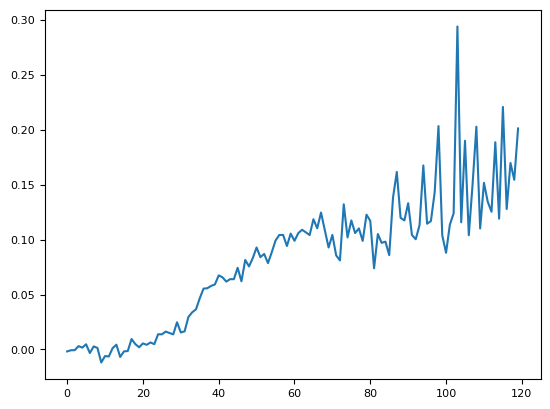

In [88]:
plt.plot(ds['TF_total_2d_pu'].values/ds['surf_temp_flux_2d_pu'].values)

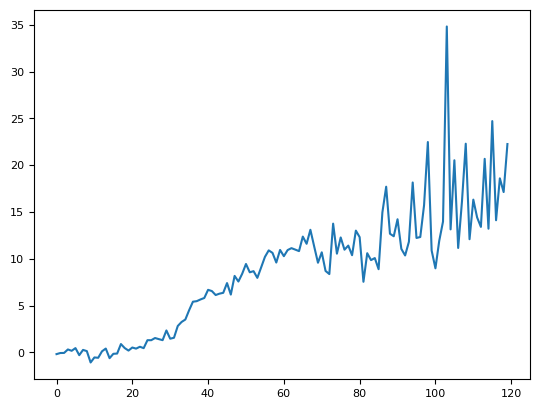

In [70]:
plt.plot((ds['TF_total_2d_pu']/ds['temp_rate_2d_pu'])*100)
# plt.ylim(0,0.4)

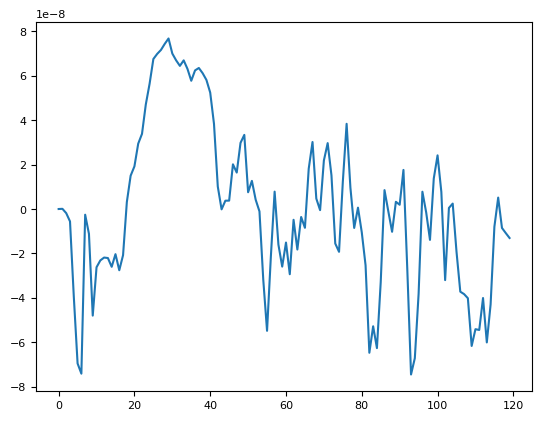

In [61]:

plt.plot(ds2['cross_shelf_temp_flux_calc_mean'].values)

In [16]:
ds=xr.open_dataset(loadpath+file_names_calc_eddy[1])
meanflux=ds['cross_shelf_temp_flux_calc_mean']
eddyflux=ds['cross_shelf_temp_flux_calc_eddy']
meanflux_percent=np.abs(meanflux)/(np.abs(meanflux)+np.abs(eddyflux))

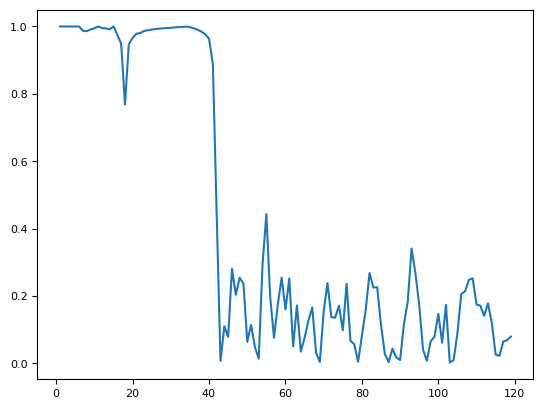

In [17]:
plt.plot(np.arange(120),meanflux_percent)

### TS snapshots temp flux due to eddy and mean field (v1)

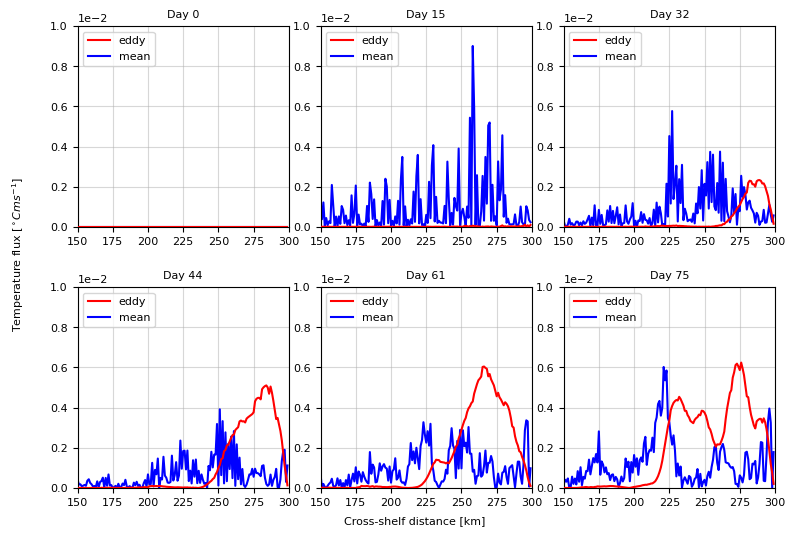

In [ ]:
# sel_day=[0,15,32,44,61,75,]
# fig=plt.figure(figsize=(9,6))
# p=chap2_funcs.plot_temp_flux_eddy_n_mean_w_days(fig,sel_day,loadpath)
# # plt.savefig(savepath+'Time_series_eddy_n_mean_6day.jpg', 
# #             format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

### TS snapshots temp flux due to eddy and mean field (v2)

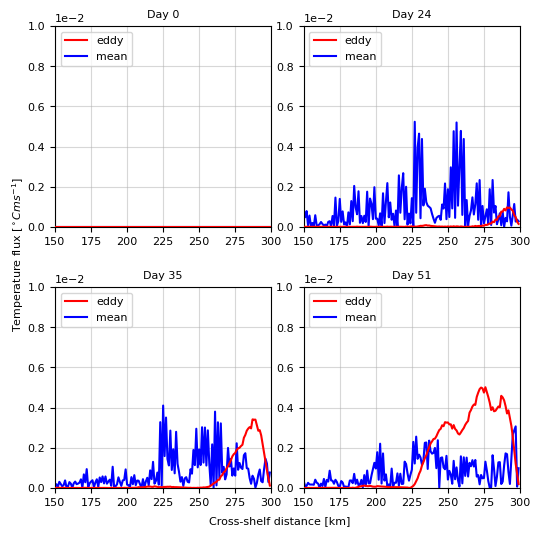

In [7]:
# sel_day=[0,24,35,51]
# fig=plt.figure(figsize=(6,6))
# p=chap2_funcs.plot_temp_flux_eddy_n_mean_w_days(fig,sel_day,loadpath)
# # plt.savefig(savepath+'Time_series_eddy_n_mean_4day.jpg', 
# #             format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

### TS snapshots temp flux due to eddy and mean field (v3--stack plot)

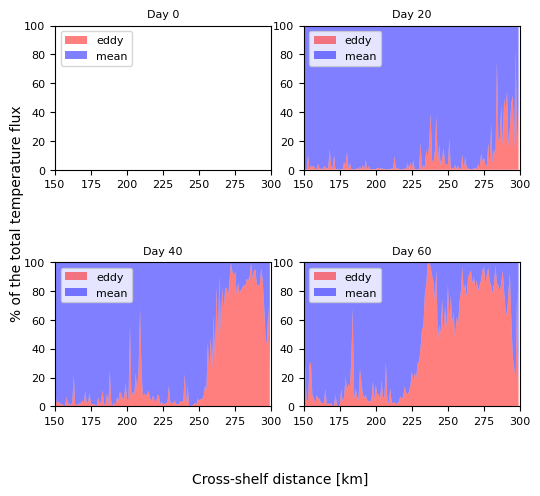

In [6]:
fig=plt.figure(figsize=(6,6))
plot=chap2_funcs.plot_percent_mean_eddy_stackplot(fig,loadpath,'dep_ave',day_sel=[0,20,40,60])
# plt.savefig(savepath+'Time_series_eddy_n_mean_stackplot.jpg', 
#             format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# ## in time series how does the cross-shelf temperature flux shrift from the mean induced to the eddy induced 
# # some scripts are adapted from cross_shelf_temp_flux_Dec_redo.ipynb

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:409: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


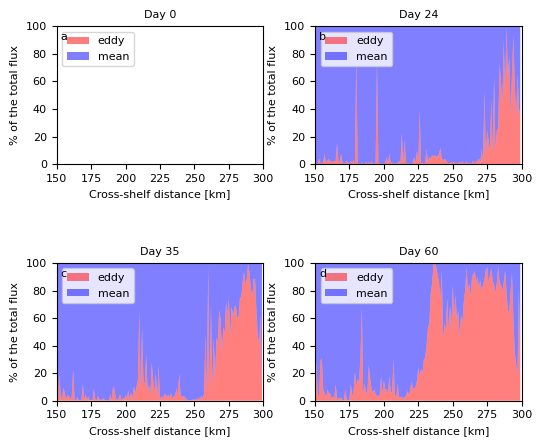

In [4]:
fig=plt.figure(figsize=(6,6))
plot=chap2_funcs.plot_percent_mean_eddy_stackplot(fig,loadpath,'dep_ave',day_sel=[0,24,35,60])
plt.savefig(savepath+'Time_series_eddy_n_mean_stackplot.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# ## in time series how does the cross-shelf temperature flux shrift from the mean induced to the eddy induced 
# # some scripts are adapted from cross_shelf_temp_flux_Dec_redo.ipynb

# Fig 3_2 -TS of base case flux snapshots w KE in 3d

sel_dates=[0,24,35]
fig=plt.figure(figsize=(7.5,7.5))
snapshots=chap2_funcs.plot_snapshots_temp_flux(fig,loadpath,sel_dates)

plt.savefig(savepath+'Fig3_2_v2.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

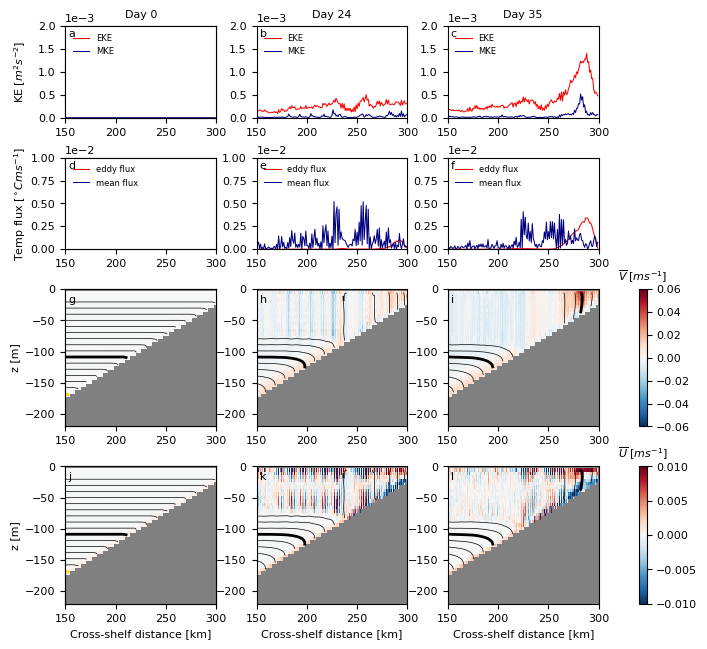

In [5]:
sel_dates=[0,24,35]
fig=plt.figure(figsize=(7.5,7.5))
snapshots=chap2_funcs.plot_snapshots_temp_flux(fig,loadpath,sel_dates)

plt.savefig(savepath+'Fig3.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [ ]:
sel_dates=[0,24,35]
fig=plt.figure(figsize=(7.5,6))
snapshots=chap2_funcs.plot_snapshots_temp_flux_U(fig,loadpath,sel_dates)

# plt.savefig(savepath+'Fig5.jpg', 
#             format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# case comparsion

In [4]:
run_numbers,run_number_names,t0s,tis,Bs,Slope_burgers,alphas,N0s,fs=chap2_funcs.obtain_run_case_summary(loadpath)

### Just EKE and u'T'

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:544: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


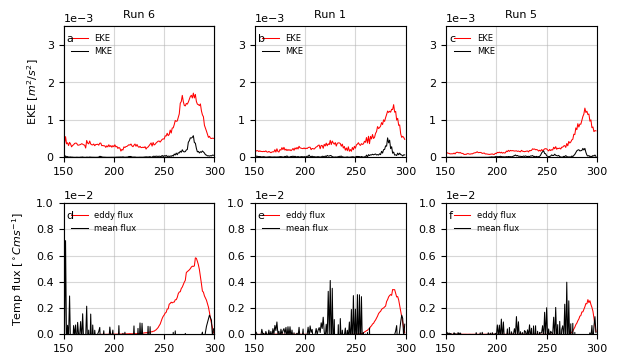

In [5]:

fig=plt.figure(figsize=(7.5,4))
case_compare_plot=chap2_funcs.plot_case_compare_uT_w_EKE( fig,'alpha',t0s,loadpath,ylims_KEs=(0,3.5e-3),)
# fig.savefig(savepath+'Fig_4_1.jpg', format='jpg', 
#                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 4- EKE,  u'T' and mean flow condition -alpha


fig=plt.figure(figsize=(7.5,5))
case_compare_plot=chap2_funcs.plot_case_compare_snapshots_U(fig,'alpha',t0s,loadpath,)

plt.savefig(savepath+'Fig_4.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:1125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


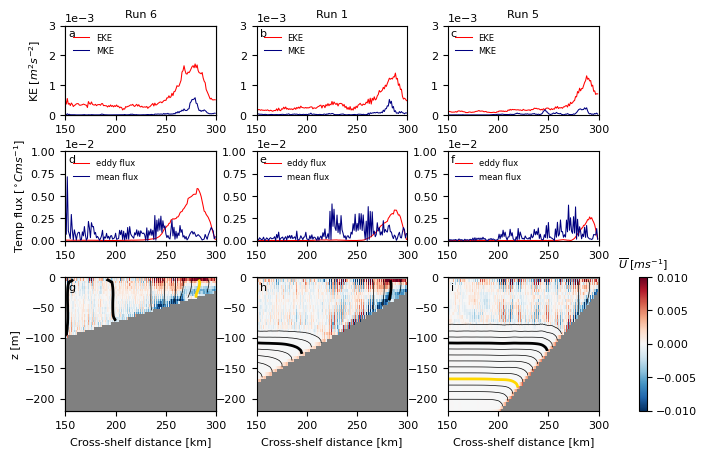

In [5]:

fig=plt.figure(figsize=(7.5,5))
case_compare_plot=chap2_funcs.plot_case_compare_snapshots_U(fig,'alpha',t0s,loadpath,)

plt.savefig(savepath+'Fig6.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 5- compare time series u'T' at 25 and 50km offshore

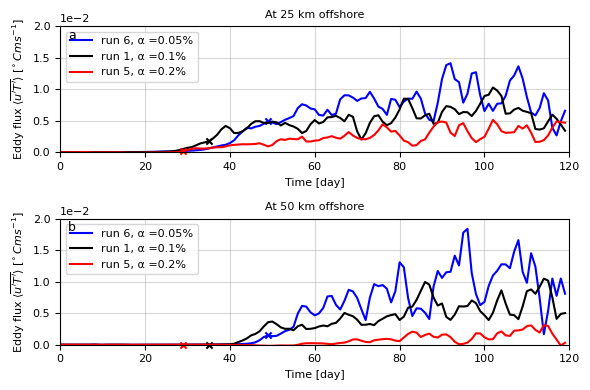

In [6]:

fig=plt.figure(figsize=(6,4))
snapshots=chap2_funcs.plot_case_compare_time_series_uT_at_25_n_50(fig,'alpha',loadpath,t0s,ylims=(0,2e-2))

# plt.savefig(savepath+'Fig5.jpg', format='jpg', 
plt.savefig(savepath+'Fig4_2.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 6- EKE,  u'T' and mean flow condition -N0

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:1125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


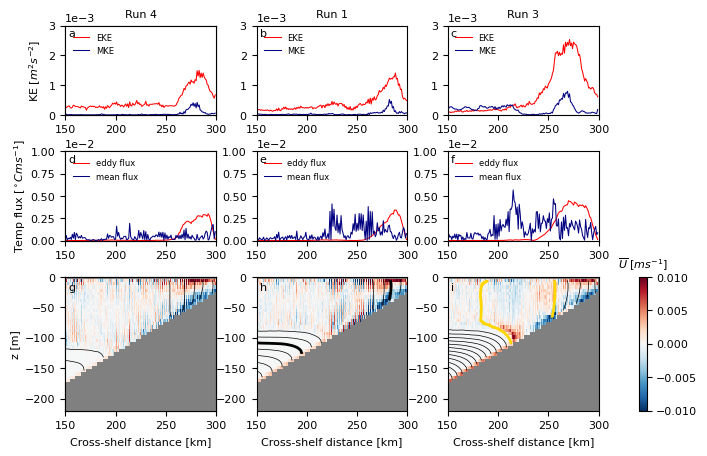

In [6]:
fig=plt.figure(figsize=(7.5,5))
case_compare_plot=chap2_funcs.plot_case_compare_snapshots_U(fig,'N0',t0s,loadpath,)

plt.savefig(savepath+'Fig8.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 7- compare time series u'T' at 25 and 50km offshore 'N0'

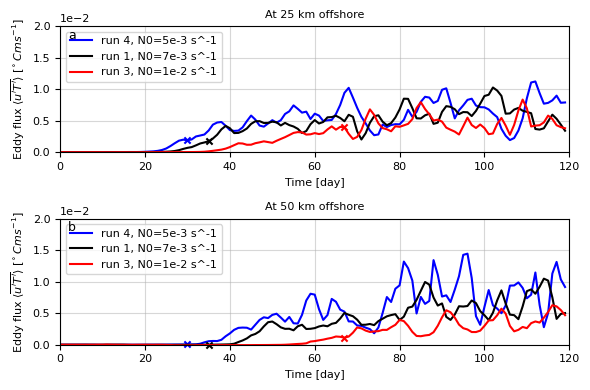

In [7]:

fig=plt.figure(figsize=(6,4))
snapshots=chap2_funcs.plot_case_compare_time_series_uT_at_25_n_50(fig,'N0',loadpath,t0s,ylims=(0,2e-2))

# plt.savefig(savepath+'Fig7.jpg', format='jpg', 
plt.savefig(savepath+'Fig4_4.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 8- EKE,  u'T' and mean flow condition -force

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_2_functions.py:1125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


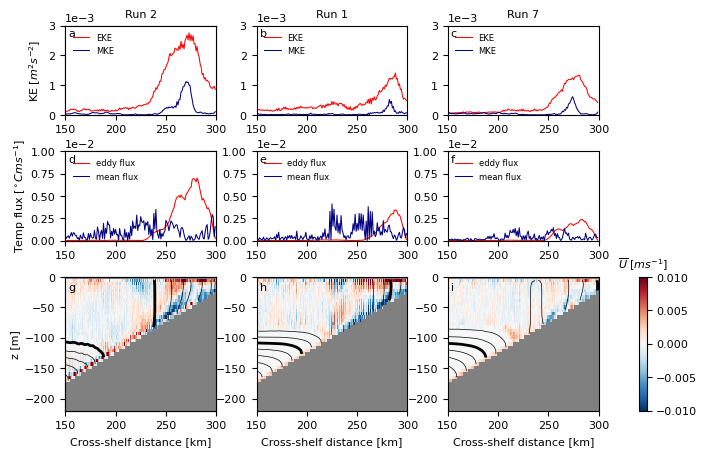

In [7]:

fig=plt.figure(figsize=(7.5,5))
snapshots=chap2_funcs.plot_case_compare_snapshots_U(fig,'force',t0s,loadpath,)

plt.savefig(savepath+'Fig10.jpg', 
            format='jpg', bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 9- compare time series u'T' at 25 and 50km offshore 'force'

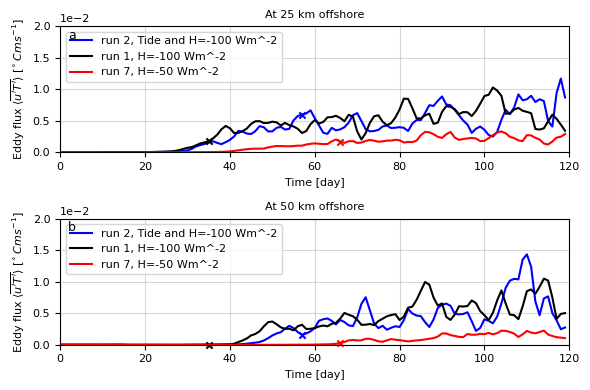

In [8]:

fig=plt.figure(figsize=(6,4))
snapshots=chap2_funcs.plot_case_compare_time_series_uT_at_25_n_50(fig,'force',loadpath,t0s,ylims=(0,2e-2))


# plt.savefig(savepath+'Fig9.jpg', format='jpg', 
plt.savefig(savepath+'Fig4_6.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# Fig 10 - eddy diffusivity

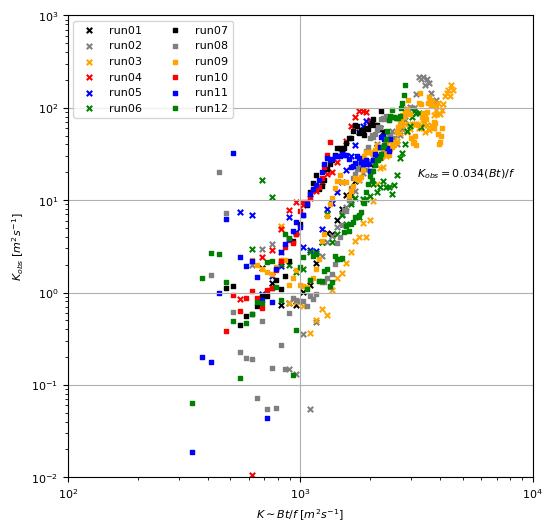

In [5]:
fig=plt.figure(figsize=(6,6))
plot=chap2_funcs.plot_eddy_diffusivity_obs_vs_pred(loadpath,fig,ylims=(1e-2,1e3))

fig.savefig(savepath+'Fig10.jpg', format='jpg', 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

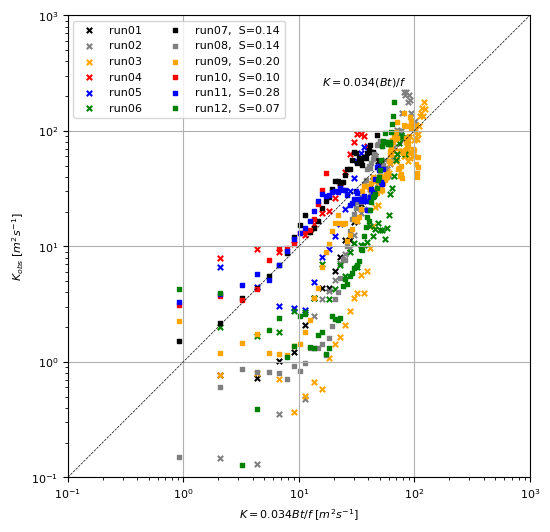

In [4]:
#Fig 10 version 2
fig=plt.figure(figsize=(6,6))
plot=chap2_funcs.plot_eddy_diffusivity_obs_vs_pred_V2_presentation(loadpath,fig,ylims=(1e-1,1e3),xlims=(1e-1,1e3))

fig.savefig(savepath+'Fig13.jpg', format='jpg', 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [5]:
chap2_funcs.obtain_kappa_Btf_fit(loadpath)

array([  0.03363693, -27.93275213])

# 1. additional plot for calculating the percentage of eddy flux divided by the total cross-shelf flux at the fastest growting eddies during the eddy development

In [4]:
run_numbers,run_number_names,t0s,tis,Bs,Slope_burgers,alphas,N0s,fs=chap2_funcs.obtain_run_case_summary(loadpath)

In [9]:
# using fitted loc

# ds_loc=xr.open_dataset(loadpath+'fitted_m_real_peak_loc.nc')
# fitted_loc=ds_loc['modified_peak_EKE_loc']

# eddy_flux_percent_fastest=[]
# eddy_divided_by_mean_fastest=[]
# temp_flux_eddy_sum=np.zeros(12)
# for k in range(12):
#     run_number=run_numbers[k]
#     t0=int(t0s[k])
#     MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)

#     total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
#     eddy_flux_percent=np.abs(temp_flux_eddy)/total_flux_abs*100
#     mean_flux_percent=np.abs(temp_flux_mean)/total_flux_abs*100
    

#     i=t0
#     peak_EKE_loc=fitted_loc[k,i].astype('int')
#     eddy_percent=eddy_flux_percent[i,peak_EKE_loc]
#     eddy_divided_by_mean=eddy_flux_percent[i,peak_EKE_loc]/mean_flux_percent[i,peak_EKE_loc]
#     temp_flux_eddy_sum[k]=np.abs(temp_flux_eddy[i,peak_EKE_loc])
    
#     eddy_flux_percent_fastest.append(eddy_percent.values)
#     eddy_divided_by_mean_fastest.append(eddy_divided_by_mean.values)

Text(0, 0.5, 'Eddy flux / Cross-shelf flux (%)')

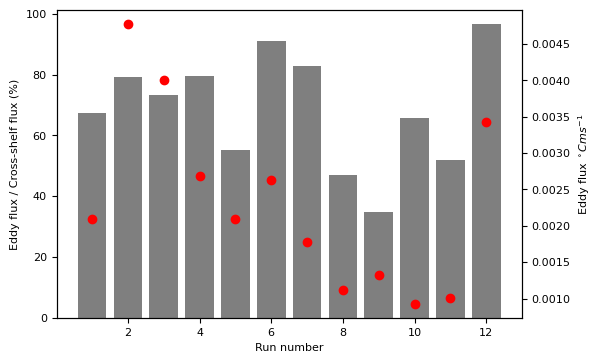

In [23]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)

for k in range(1,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)
    #plot in second y axis

for k in range(0,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)
    
ax2 = ax.twinx()
ax2.scatter(run_number_names[0:12].values,temp_flux_eddy_sum,color='r',zorder=10)
ax2.set_ylabel(r'Eddy flux $[^\circ C ms^{-1}]$',fontsize=8)
ax.set_xlabel('Run number',fontsize=8)
ax.set_ylabel('Eddy flux / Cross-shelf flux (%)',fontsize=8)


In [6]:
# using real peak EKE loc

eddy_flux_percent_fastest=[]
eddy_divided_by_mean_fastest=[]
temp_flux_eddy_sum=np.zeros(12)
for k in range(12):
    run_number=run_numbers[k]
    t0=int(t0s[k])
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)

    total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
    eddy_flux_percent=np.abs(temp_flux_eddy)/total_flux_abs*100
    mean_flux_percent=np.abs(temp_flux_mean)/total_flux_abs*100

    i=t0
    peak_EKE_loc=np.argmax(EKE_pu.values[t0,150::])+150
    eddy_percent=eddy_flux_percent[i,peak_EKE_loc]
    eddy_divided_by_mean=eddy_flux_percent[i,peak_EKE_loc]/mean_flux_percent[i,peak_EKE_loc]

    temp_flux_eddy_sum[k]=np.abs(temp_flux_eddy[i,peak_EKE_loc])

    eddy_flux_percent_fastest.append(eddy_percent.values)
    eddy_divided_by_mean_fastest.append(eddy_divided_by_mean.values)

# eddy_flux_percent_during_development=np.nanmean(eddy_flux_percent_fastest)
# eddy_flux_divided_by_mean_during_development=np.nanmean(eddy_divided_by_mean_fastest)
    
eddy_flux_percent_fastest[4]=np.nan
temp_flux_eddy_sum[4]=np.nan
# as run_numbers[4]=18, the eddy field faile evolve into a developed stage

In [17]:
# zip run_number_names[0:12].values and temp_flux_eddy_sum
# and sort by run_number_names
temp_flux_eddy_sum_sort=[x for _,x in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]
run_number_names_sort=[x for x,_ in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]

In [5]:
from matplotlib import ticker

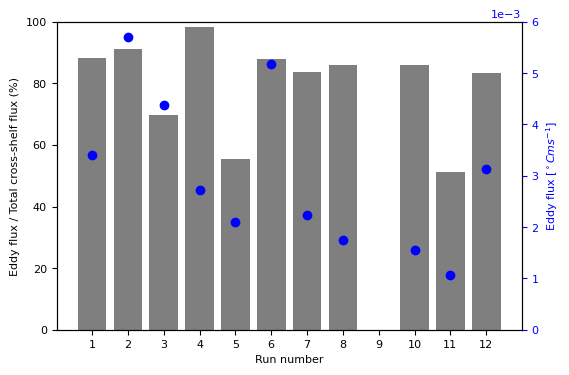

In [25]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
for k in range(1,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)

for k in range(0,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)

ax.set_ylim(0,100)
ax2 = ax.twinx()
ax2.scatter(run_number_names_sort,temp_flux_eddy_sum_sort,color='b',zorder=10)
ax2.set_ylabel(r'Eddy flux $[^\circ C ms^{-1}]$',fontsize=8)
ax2.set_ylim(0,6e-3)

#set ax2 axis red color
ax2.yaxis.label.set_color('b')
#set ax2 axis ticklabel red color
ax2.tick_params(axis='y', colors='b')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Run number',fontsize=8)
ax.set_ylabel('Eddy flux / Total cross-shelf flux (%)',fontsize=8)
fig.savefig(savepath+'Fig4_7_addon_v2.jpg', format='jpg', 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

# would the cases show similarity once they all passed t_ed?

In [16]:
t0s[4]=80 #because we want to investigate after t_ed, this run didn't have a vlid t_ed and will be removed later
eddy_flux_percent_fastest=[]
eddy_divided_by_mean_fastest=[]
temp_flux_eddy_sum=np.zeros(12)
for k in range(12):
        run_number=run_numbers[k]
        t0=int(t0s[k]+5)
        MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)

        total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
        eddy_flux_percent=np.abs(temp_flux_eddy)/total_flux_abs*100
        mean_flux_percent=np.abs(temp_flux_mean)/total_flux_abs*100

        i=t0
        peak_EKE_loc=np.argmax(EKE_pu.values[t0,150::])+150
        eddy_percent=eddy_flux_percent[i,peak_EKE_loc]
        eddy_divided_by_mean=eddy_flux_percent[i,peak_EKE_loc]/mean_flux_percent[i,peak_EKE_loc]

        temp_flux_eddy_sum[k]=np.abs(temp_flux_eddy[i,peak_EKE_loc])

        eddy_flux_percent_fastest.append(eddy_percent.values)
        eddy_divided_by_mean_fastest.append(eddy_divided_by_mean.values)



# eddy_flux_percent_during_development=np.nanmean(eddy_flux_percent_fastest)
# eddy_flux_divided_by_mean_during_development=np.nanmean(eddy_divided_by_mean_fastest)
    
eddy_flux_percent_fastest[4]=np.nan
temp_flux_eddy_sum[4]=np.nan
# as run_numbers[4]=18, the eddy field faile evolve into a developed stage

temp_flux_eddy_sum_sort=[x for _,x in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]
run_number_names_sort=[x for x,_ in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]

In [42]:
# using fitted loc
t0s[4]=80 #because we want to investigate after t_ed, this run didn't have a vlid t_ed and will be removed later

ds_loc=xr.open_dataset(loadpath+'fitted_m_real_peak_loc.nc')
fitted_loc=ds_loc['modified_peak_EKE_loc']

eddy_flux_percent_fastest=[]
eddy_divided_by_mean_fastest=[]
temp_flux_eddy_sum=np.zeros(12)
for k in range(12):
    run_number=run_numbers[k]
    t0=int(t0s[k]+5)
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)

    total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
    eddy_flux_percent=np.abs(temp_flux_eddy)/total_flux_abs*100
    mean_flux_percent=np.abs(temp_flux_mean)/total_flux_abs*100
    

    i=t0
    peak_EKE_loc=fitted_loc[k,i].astype('int')
    eddy_percent=eddy_flux_percent[i,peak_EKE_loc]
    eddy_divided_by_mean=eddy_flux_percent[i,peak_EKE_loc]/mean_flux_percent[i,peak_EKE_loc]
    temp_flux_eddy_sum[k]=np.abs(temp_flux_eddy[i,peak_EKE_loc])
    
    eddy_flux_percent_fastest.append(eddy_percent.values)
    eddy_divided_by_mean_fastest.append(eddy_divided_by_mean.values)

eddy_flux_percent_fastest[4]=np.nan
temp_flux_eddy_sum[4]=np.nan
# as run_numbers[4]=18, the eddy field faile evolve into a developed stage

temp_flux_eddy_sum_sort=[x for _,x in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]
run_number_names_sort=[x for x,_ in sorted(zip(run_number_names[0:12].values,temp_flux_eddy_sum))]

Text(0.5, 1.0, '5 days after $t_{ed}$')

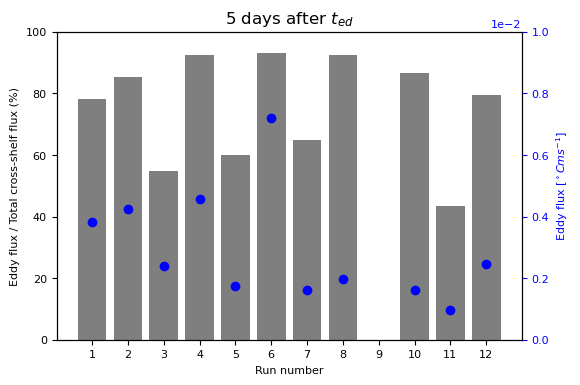

In [17]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
for k in range(1,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)

for k in range(0,12,2):
    run_number_name=run_number_names[k]
    ax.bar(run_number_name,eddy_flux_percent_fastest[k],color='k',label='run{:02d}'.format(run_number_name),alpha=0.5)

ax.set_ylim(0,100)
ax2 = ax.twinx()
ax2.scatter(run_number_names_sort,temp_flux_eddy_sum_sort,color='b',zorder=10)
ax2.set_ylabel(r'Eddy flux $[^\circ C ms^{-1}]$',fontsize=8)
ax2.set_ylim(0,10e-3)

#set ax2 axis red color
ax2.yaxis.label.set_color('b')
#set ax2 axis ticklabel red color
ax2.tick_params(axis='y', colors='b')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Run number',fontsize=8)
ax.set_ylabel('Eddy flux / Total cross-shelf flux (%)',fontsize=8)

plt.title('5 days after $t_{ed}$')

what if during the eddy development?

In [60]:
k=1
run_number_name=run_number_names[k]
run_number=run_numbers[k]
ti=int(tis[k])
t0=int(t0s[k])
MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)
    


In [62]:
peak_EKE_loc=np.argmax(EKE_pu.values[ti:t0,150::],axis=1)+150

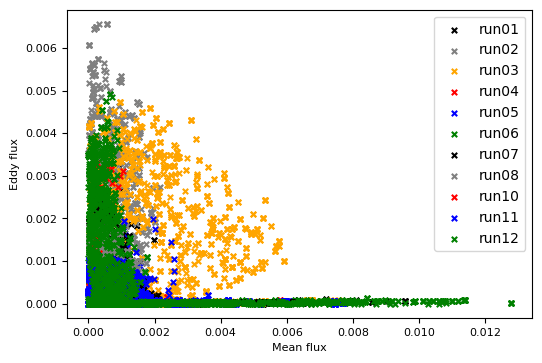

In [66]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
color_group=['k','k','grey','grey','orange','orange','r','r','b','b','g','g']
for k in range(1,12,2):
    run_number_name=run_number_names[k]
    run_number=run_numbers[k]
    ti=int(tis[k])
    t0=int(t0s[k])
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)
    
    peak_EKE_loc=np.argmax(EKE_pu.values[ti:t0,150::],axis=1)+150
    total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
    eddy_flux_percent=np.abs(temp_flux_eddy)
    mean_flux_percent=np.abs(temp_flux_mean)

    ax.scatter(mean_flux_percent[ti:t0,peak_EKE_loc],eddy_flux_percent[ti:t0,peak_EKE_loc],
            color=color_group[k],marker='x',s=15,label='run{:02d}'.format(run_number_name))
    

for k in [0,2,6,8,10]:
    run_number_name=run_number_names[k]
    run_number=run_numbers[k]
    ti=int(tis[k])
    t0=int(t0s[k])
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)
    peak_EKE_loc=np.argmax(EKE_pu.values[ti:t0,150::],axis=1)+150
    total_flux_abs=np.abs(temp_flux_eddy)+np.abs(temp_flux_mean)
    eddy_flux_percent=np.abs(temp_flux_eddy)
    mean_flux_percent=np.abs(temp_flux_mean)

    ax.scatter(mean_flux_percent[ti:t0,peak_EKE_loc],eddy_flux_percent[ti:t0,peak_EKE_loc],
            color=color_group[k],marker='x',s=15,label='run{:02d}'.format(run_number_name))
    

ax.set_xlabel('Mean flux',fontsize=8)
ax.set_ylabel('Eddy flux',fontsize=8)
plt.legend()
# fig.savefig(savepath+'Fig4_7.jpg', format='jpg', 
#                 bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [75]:
# with previous fitted loc (peak EKE)
ori_ds=xr.open_dataset(loadpath+'fitted_loc_w_wavelength.nc')
fitted_loc=ori_ds['fitted_loc']

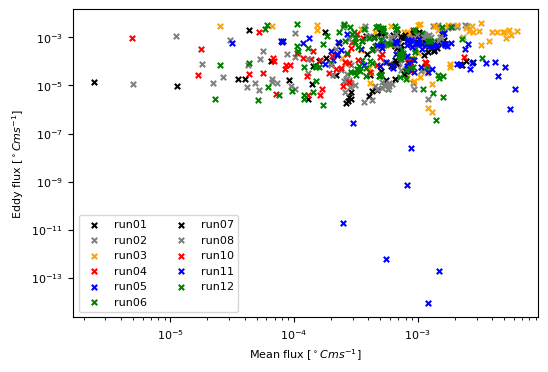

In [81]:

fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
color_group=['k','k','grey','grey','orange','orange','r','r','b','b','g','g']
for k in range(1,12,2):
    run_number_name=run_number_names[k]
    run_number=run_numbers[k]
    ti=int(tis[k])
    t0=int(t0s[k])
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)
    
    peak_EKE_loc=fitted_loc[k,...].astype('int')
    eddy_flux_percent=np.abs(temp_flux_eddy)
    mean_flux_percent=np.abs(temp_flux_mean)

    ax.scatter(mean_flux_percent[ti:t0,peak_EKE_loc[ti:t0]],eddy_flux_percent[ti:t0,peak_EKE_loc[ti:t0]],
            color=color_group[k],marker='x',s=15,label='run{:02d}'.format(run_number_name))
    

for k in [0,2,6,8,10]:
    run_number_name=run_number_names[k]
    run_number=run_numbers[k]
    ti=int(tis[k])
    t0=int(t0s[k])
    MKE_pu,EKE_pu,temp_flux_mean,temp_flux_eddy,v_bar,u_bar,rho_bar,layer_depth=chap2_funcs.prep_temp_flux_3d(loadpath,run_number=run_number)
    peak_EKE_loc=fitted_loc[k,...].astype('int')

    eddy_flux_percent=np.abs(temp_flux_eddy)
    mean_flux_percent=np.abs(temp_flux_mean)
    ax.scatter(mean_flux_percent[ti:t0,peak_EKE_loc[ti:t0]],eddy_flux_percent[ti:t0,peak_EKE_loc[ti:t0]],
            color=color_group[k],marker='x',s=15,label='run{:02d}'.format(run_number_name))
    

ax.set_xlabel('Mean flux $[^\circ C ms^{-1}]$',fontsize=8)
ax.set_ylabel('Eddy flux $[^\circ C ms^{-1}]$',fontsize=8)
plt.legend(ncol=2,fontsize=8)
plt.yscale('log')
plt.xscale('log')

# 2. additional test for the cross-shelf averaged density graident in the along-shelf and depth averaged density (Pringle)

In [25]:
run_number=32
ds_temp_mean=xr.open_dataset(loadpath+'run{:02d}_temp_mean.nc'.format(run_number))
# ds_temp_mean
Temp_mean_rm_ini=ds_temp_mean['Temp_mean_rm_initial']
Temp_mean=ds_temp_mean['Temp_mean']
layer_depth=ds_temp_mean['layer_depth']


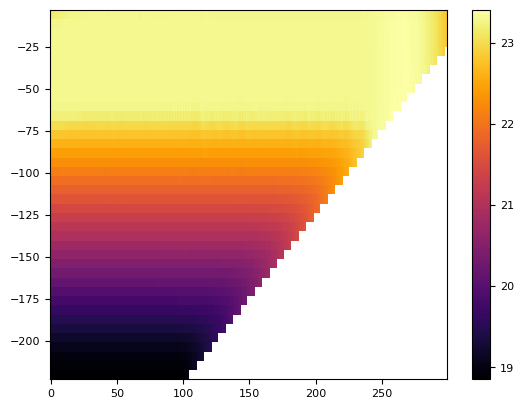

In [36]:
plt.pcolormesh(np.arange(300),-layer_depth,Temp_mean[20,...],cmap='inferno')
plt.colorbar()

In [38]:
# dTbar_dx=np.gradient(Temp_mean_rm_ini,1e3,axis=2)
dTbar_dx=np.gradient(Temp_mean,-1e3,axis=2)
dTbar_dx_da=np.nanmean(dTbar_dx,axis=1)

In [44]:
Temp_mean

<xarray.DataArray 'Temp_mean' (time: 120, layer_depth: 40, cross_shelf: 300)>
array([[[24.72384 , 24.72384 , ..., 24.723778, 24.723951],
        [24.736046, 24.736046, ..., 24.735407, 24.735635],
        ...,
        [18.649331, 18.649331, ...,       nan,       nan],
        [18.504129, 18.504129, ...,       nan,       nan]],

       [[24.391499, 24.391499, ..., 24.394384, 24.410153],
        [24.658875, 24.658875, ..., 24.622128, 24.657597],
        ...,
        [18.65794 , 18.65794 , ...,       nan,       nan],
        [18.541238, 18.541238, ...,       nan,       nan]],

       ...,

       [[20.719626, 20.752569, ..., 19.267881, 19.227167],
        [20.836442, 20.846885, ..., 19.291494, 19.259668],
        ...,
        [19.502228, 19.502275, ...,       nan,       nan],
        [19.486042, 19.486079, ...,       nan,       nan]],

       [[20.702527, 20.735446, ..., 19.243335, 19.200336],
        [20.819207, 20.829661, ..., 19.265721, 19.229345],
        ...,
        [19.506814, 19.506864, ...,       nan,       nan],
        [19.490665, 19.490705, ...,       nan,       nan]]])
Coordinates:
  * time         (time) int32 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119
  * layer_depth  (layer_depth) float64 5.5 11.0 16.5 22.0 ... 209.0 214.5 220.0
  * cross_shelf  (cross_shelf) int32 0 1 2 3 4 5 6 ... 294 295 296 297 298 299

In [32]:
dTbar_dx_da.shape

(120, 300)

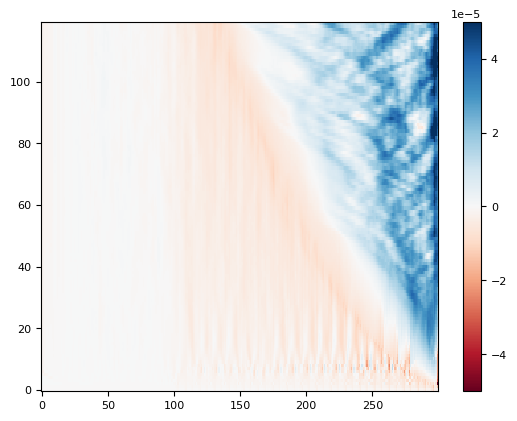

In [39]:
plt.pcolormesh(np.arange(300),np.arange(120),dTbar_dx_da,cmap='RdBu',vmax=5e-5,vmin=-5e-5)
plt.colorbar()

In [42]:
dTdbar_mean=dTbar_dx_da.mean(axis=1)


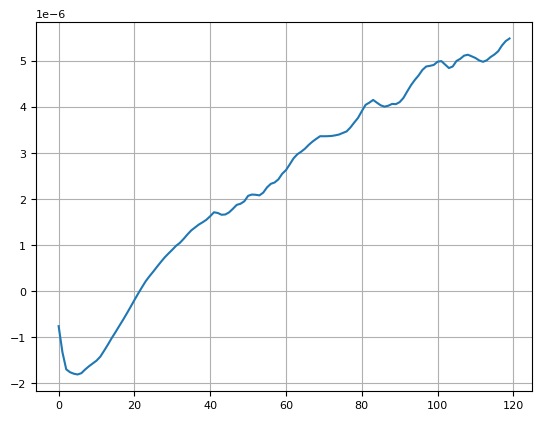

In [43]:
plt.plot(np.arange(120),dTdbar_mean)
plt.grid()
# plt.xlim(0,20)

In [46]:
# It never statifify 
# what if we use SML
import Chapter_1_functions as chap1_funcs

In [51]:
k=1
MLD_run_k=chap1_funcs.obtain_MLD_for_the_run(loadpath,k)
dz=layer_depth.values[1]-layer_depth.values[0]


In [54]:
dTbar_dx_da_SML=np.zeros([120,300])
for i in range(120):
    ver_idx=int(MLD_run_k[i]/dz)
    dTbar_dx_da_SML=np.nanmean(dTbar_dx[:,0:ver_idx,:],axis=1)

In [57]:
dTdbar_mean_SML=dTbar_dx_da_SML.mean(axis=1)

In [59]:
dTdbar_mean_SML

array([-6.55999314e-07, -1.15140017e-06, -1.49149503e-06, -1.53025586e-06,
       -1.54459479e-06, -1.54986130e-06, -1.50892393e-06, -1.41123943e-06,
       -1.32932232e-06, -1.25819321e-06, -1.18749953e-06, -1.09186892e-06,
       -9.55432306e-07, -8.14379775e-07, -6.66754255e-07, -5.30526492e-07,
       -3.88652637e-07, -2.50054422e-07, -1.04849215e-07,  4.40207697e-08,
        1.95259245e-07,  3.42942658e-07,  4.84165964e-07,  6.20791730e-07,
        7.33280149e-07,  8.37631548e-07,  9.47179819e-07,  1.05323427e-06,
        1.15469075e-06,  1.24284323e-06,  1.32696826e-06,  1.41557997e-06,
        1.48224758e-06,  1.57270606e-06,  1.67071906e-06,  1.76076290e-06,
        1.82710519e-06,  1.89299001e-06,  1.94452587e-06,  2.00216168e-06,
        2.08070136e-06,  2.16857503e-06,  2.15512762e-06,  2.11859960e-06,
        2.12708100e-06,  2.17521529e-06,  2.25511647e-06,  2.34055816e-06,
        2.36681672e-06,  2.42158981e-06,  2.54178641e-06,  2.57190578e-06,
        2.56792056e-06,  

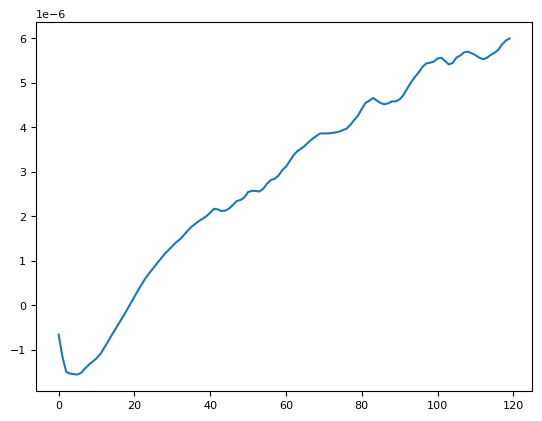

In [58]:
plt.plot(np.arange(120),dTdbar_mean_SML)